imports

In [6]:
import pandas as pd
import numpy as np
import os

# print current path
# print('Current path: ')
# print(os.getcwd())

# Replace 'path_to_dataset' with the actual path to your dataset file
dataset_path = 'data/heart.csv'
df_continuous = pd.read_csv(dataset_path)


Current path: 
/home/gr00stl/Nextcloud/UNI/wdwa/heart_disease


Initial Data Inspection

In [7]:
# Display the first few rows of the dataset
print(df_continuous.head())

# Get a concise summary of the dataframe
print(df_continuous.info())

# Summary statistics for numeric columns
print(df_continuous.describe())

# Check for the presence of null values
print(df_continuous.isnull().sum())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

### Analyzing Data Types and Statistics

In [8]:
df_continuous.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Outliers

#### Box plots

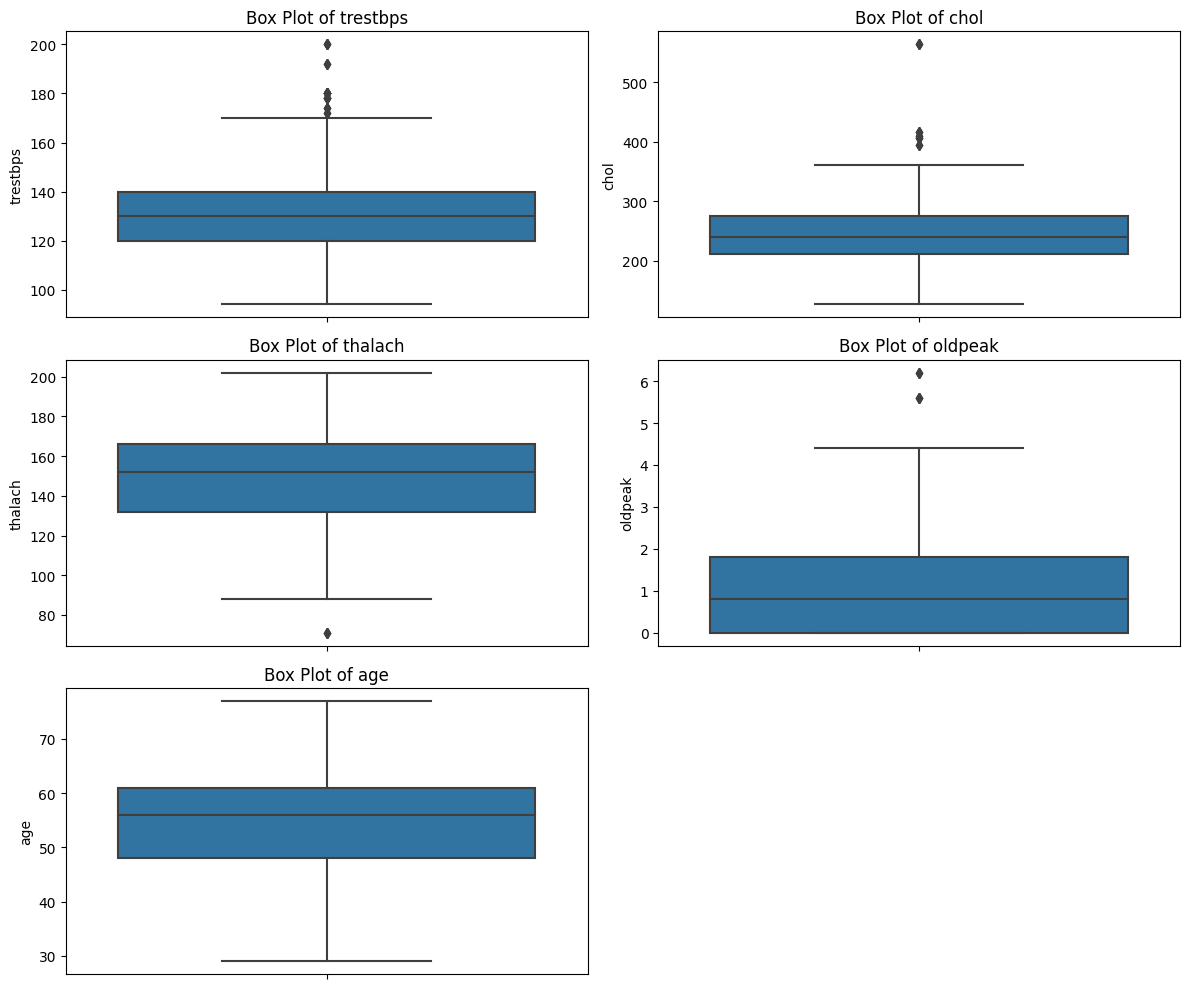

In [18]:
# box plot to check for outliers

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# List of continuous variables to check for outliers
continuous_vars = ['trestbps', 'chol', 'thalach', 'oldpeak', 'age']

display(HTML('<h1>BOX PLOTS</h1>'))

# Plotting box plots with title
plt.figure(figsize=(12, 10))
for i, var in enumerate(continuous_vars[:5]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df_continuous[var])
    plt.title(f"Box Plot of {var}")



plt.tight_layout()
plt.show()


In [22]:
# Example using the chol (cholesterol) variable
Q1 = df_continuous['chol'].quantile(0.25)
Q3 = df_continuous['chol'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df_continuous[(df_continuous['chol'] < lower_bound) | (df_continuous['chol'] > upper_bound)]
print("Number of outliers in 'chol':", outliers.shape[0])
print("Outliers:\n", outliers)

Number of outliers in 'chol': 16
Outliers:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
158   67    0   2       115   564    0        0      160      0      1.6   
179   56    0   0       134   409    0        0      150      1      1.9   
192   67    0   2       115   564    0        0      160      0      1.6   
255   62    0   0       140   394    0        0      157      0      1.2   
450   63    0   0       150   407    0        0      154      0      4.0   
464   67    0   2       115   564    0        0      160      0      1.6   
481   63    0   0       150   407    0        0      154      0      4.0   
542   62    0   0       140   394    0        0      157      0      1.2   
578   62    0   0       140   394    0        0      157      0      1.2   
641   56    0   0       134   409    0        0      150      1      1.9   
665   65    0   2       140   417    1      

In [39]:
df_continuous = df_continuous[continuous_vars]

# Calculate IQR for each continuous column and create the mask
outlier_mask = pd.DataFrame(np.zeros(df_continuous.shape, dtype=int), columns=df_continuous.columns)

for col in continuous_vars:
    Q1 = df_continuous[col].quantile(0.25)
    Q3 = df_continuous[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Outliers are marked with a 1, non-outliers with a 0
    outlier_mask[col] = ((df_continuous[col] < lower_bound) | (df_continuous[col] > upper_bound)).astype(int)

outlier_mask.where(outlier_mask == 1).dropna(how='all')

# show original data for outliers -> outlier_mask == 1

# Create a mask for rows that contain at least one outlier
rows_with_outliers = outlier_mask.any(axis=1)

# Apply this mask to the original dataframe to show only the rows with outliers
df_outliers = df_continuous[rows_with_outliers]
df_outliers

,trestbps,chol,thalach,oldpeak,age
29,180,327,117,3.4,55
47,178,228,165,1.0,66
54,140,217,111,5.6,55
55,140,217,111,5.6,55
69,160,164,145,6.2,62
87,174,249,143,0.0,59
123,140,417,157,0.8,65
137,180,325,154,0.0,64
151,192,283,195,0.0,54
158,115,564,160,1.6,67
